## Previous Story

## 전에 설치하기
- pip install statsmodels

## 데이터 만들기

In [1]:
import pandas as pd

data = {'x' :[1., 2., 3., 4., 5.], 'y':[1., 3., 4., 6., 5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


## 가설

In [2]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula="y ~ x", data=df).fit()

## 결과

In [3]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

## seaborn을 import하고

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## seaborn을 이용해서 plot

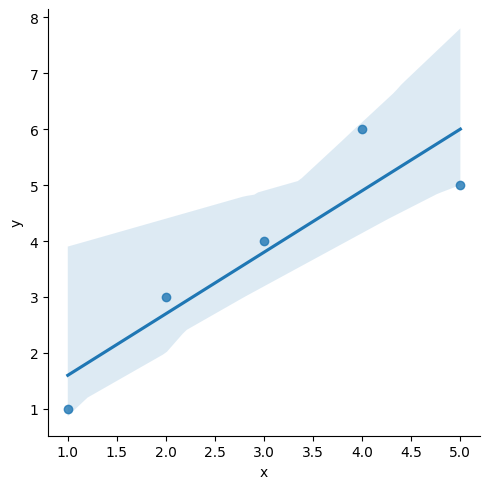

In [13]:
sns.lmplot(x='x', y='y', data=df);


## 잔차 평가 residue
- 잔차는 평균이 0인 정규분포를 따르는 것 이어야 함
- 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인

## 잔차 확인

In [14]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

## 결정계수 R-Squared
- y_hat은 예측된 값
- 예측 값과 실제 값(y)이 일치하면 결정계수는 1이 됨 (즉 결정계수가 높을 수록 좋은 모델)

## numpy로 직접 결정계수 계산

In [15]:
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2 / np.sum((y - mu)**2))

0.8175675675675673

## 간단하게 구하기

In [16]:
lm_model.rsquared

0.8175675675675677

## 잔차의 분포도 확인

/tmp/ipykernel_15602/1258040113.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resid, color='black');


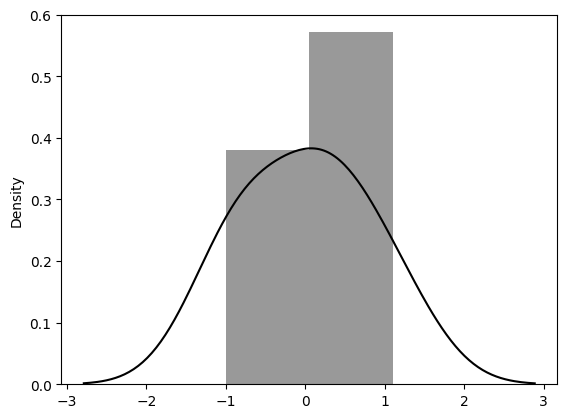

In [18]:
sns.distplot(resid, color='black');